## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pickle
import joblib

In [4]:
data = pd.read_csv("D:\DATA  SCIENCE\iNeuron\Thyroid Project\hypothyroid.csv")

In [5]:
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,0,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,0,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,0,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,0,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,0,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,0,other,P
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,124.0,t,1.08,t,114.0,f,0,SVI,P
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,112.0,t,1.07,t,105.0,f,0,other,P
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,82.0,t,0.94,t,87.0,f,0,SVI,P


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

## Data Preprocessing

In [7]:
X = data.iloc[:, :29]
X

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,0,SVHC
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,0,other
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,0,other
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,0,other
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,0,SVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,f,0,other
3768,68.0,F,f,f,f,f,f,f,f,f,...,2.1,t,124.0,t,1.08,t,114.0,f,0,SVI
3769,74.0,F,f,f,f,f,f,f,f,f,...,1.8,t,112.0,t,1.07,t,105.0,f,0,other
3770,72.0,M,f,f,f,f,f,f,f,f,...,2.0,t,82.0,t,0.94,t,87.0,f,0,SVI


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [9]:
y = data.loc[:,['binaryClass']]
y

,binaryClass
0,P
1,P
2,P
3,P
4,P
...,...
3767,P
3768,P
3769,P
3770,P


In [10]:
(data['binaryClass'].value_counts()/3772)*100

P    92.28526
N     7.71474
Name: binaryClass, dtype: float64

# Seperating Numeric and Non-Numeric columns

In [11]:
num_x = X.select_dtypes(exclude = ['object']).columns

In [12]:
num_x

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object')

In [13]:
cat_x = X.select_dtypes(include = ['object']).columns

In [14]:
cat_x

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
       'TBG measured', 'referral source'],
      dtype='object')

# Outlier Analysis

age       AxesSubplot(0.125,0.11;0.0945122x0.77)
TSH    AxesSubplot(0.238415,0.11;0.0945122x0.77)
T3     AxesSubplot(0.351829,0.11;0.0945122x0.77)
TT4    AxesSubplot(0.465244,0.11;0.0945122x0.77)
T4U    AxesSubplot(0.578659,0.11;0.0945122x0.77)
FTI    AxesSubplot(0.692073,0.11;0.0945122x0.77)
TBG    AxesSubplot(0.805488,0.11;0.0945122x0.77)
dtype: object

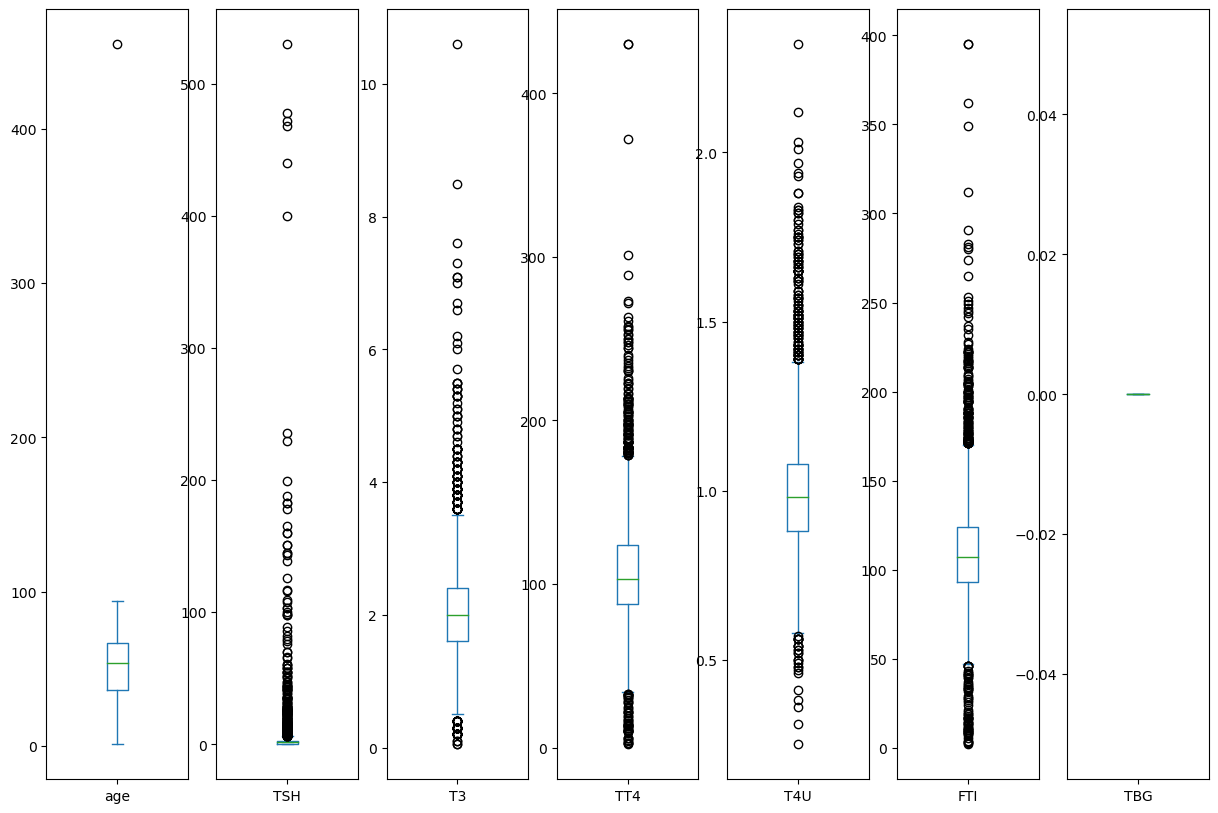

In [15]:
data.plot(kind = "box", subplots = True, sharey = False, figsize = (15, 10))

## Imputation to handle Missing Values

# Mode imputation

In [16]:
cat_pipeline_mode = Pipeline(steps = [('impute', SimpleImputer(strategy = 'most_frequent'))])

In [17]:
preprocessor = ColumnTransformer(transformers = [('categarical', cat_pipeline_mode, cat_x)])

In [18]:
mode_impute = preprocessor.fit(X)

In [19]:
# Save the imputation model using joblib

joblib.dump(mode_impute, 'modeimpute')

['modeimpute']

In [20]:
mode_impute

ColumnTransformer(transformers=[('categarical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
       'TBG measured', 'referral source'],
      dtype='object'))])

In [21]:
imputation_mode = pd.DataFrame(mode_impute.transform(X), columns = cat_x)
imputation_mode

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,referral source
0,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVHC
1,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,f,f,f,other
2,M,f,f,f,f,f,f,f,f,f,...,f,f,f,t,f,t,t,t,f,other
3,F,t,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,f,f,f,other
4,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,F,f,f,f,f,f,f,f,f,f,...,t,f,f,f,f,f,f,f,f,other
3768,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVI
3769,F,f,f,f,f,f,f,f,f,t,...,f,f,f,t,t,t,t,t,f,other
3770,M,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVI


# Median Imputation

In [22]:
num_pipeline_median = Pipeline(steps = [('impute', SimpleImputer(strategy = 'median'))])

In [23]:
preprocessor = ColumnTransformer(transformers = [('numerical', num_pipeline_median, num_x)])

In [24]:
median_impute = preprocessor.fit(X)

In [25]:
# Save the mean imputation model using joblib

joblib.dump(median_impute, 'medianimpute')

['medianimpute']

In [26]:
median_impute

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object'))])

In [27]:
imputation_median = pd.DataFrame(median_impute.transform(X), columns = num_x)
imputation_median

,age,TSH,T3,TT4,T4U,FTI,TBG
0,41.0,1.30,2.5,125.0,1.14,109.0,0.0
1,23.0,4.10,2.0,102.0,0.98,107.0,0.0
2,46.0,0.98,2.0,109.0,0.91,120.0,0.0
3,70.0,0.16,1.9,175.0,0.98,107.0,0.0
4,70.0,0.72,1.2,61.0,0.87,70.0,0.0
...,...,...,...,...,...,...,...
3767,30.0,1.40,2.0,103.0,0.98,107.0,0.0
3768,68.0,1.00,2.1,124.0,1.08,114.0,0.0
3769,74.0,5.10,1.8,112.0,1.07,105.0,0.0
3770,72.0,0.70,2.0,82.0,0.94,87.0,0.0


## Encoding - One Hot Encoder to convert Categorical data to Numeric values

In [28]:
encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])

In [29]:
preprocess_pipeline = ColumnTransformer([('features', encoding_pipeline, cat_x)])

In [30]:
encode = preprocess_pipeline.fit(X)

In [31]:
encode

ColumnTransformer(transformers=[('features',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
       'TBG measured', 'referral source'],
      dtype='object'))])

In [35]:
## Dumping the Encoding 

joblib.dump(encode,'encoding')

['encoding']

In [36]:
encode_data = pd.DataFrame(encode.transform(X))

In [37]:
encode_data

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3769,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3770,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
cat_x

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
       'TBG measured', 'referral source'],
      dtype='object')

## Normalization

### MinMaxScaler to convert the magnitude of the columns to a range of 0 to 1

In [39]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [40]:
preprocessor = ColumnTransformer([('scale', scale_pipeline, num_x)])

In [41]:
scale = preprocessor.fit(imputation_median)

In [42]:
# Save the MinMaxScaler Model

joblib.dump(scale, 'minmax')

['minmax']

In [43]:
scale

ColumnTransformer(transformers=[('scale',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object'))])

In [44]:
scaled_data = pd.DataFrame(scale.transform(imputation_median))
scaled_data

,0,1,2,3,4,5,6
0,0.088106,0.002443,0.232227,0.287383,0.429952,0.272265,0.0
1,0.048458,0.007726,0.184834,0.233645,0.352657,0.267176,0.0
2,0.099119,0.001840,0.184834,0.250000,0.318841,0.300254,0.0
3,0.151982,0.000292,0.175355,0.404206,0.352657,0.267176,0.0
4,0.151982,0.001349,0.109005,0.137850,0.299517,0.173028,0.0
...,...,...,...,...,...,...,...
3767,0.063877,0.002632,0.184834,0.235981,0.352657,0.267176,0.0
3768,0.147577,0.001877,0.194313,0.285047,0.400966,0.284987,0.0
3769,0.160793,0.009613,0.165877,0.257009,0.396135,0.262087,0.0
3770,0.156388,0.001311,0.184834,0.186916,0.333333,0.216285,0.0


In [45]:
# Here concatinating data 

clean_data = pd.concat([scaled_data, encode_data], axis = 1, ignore_index = True)

In [46]:
clean_data

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.088106,0.002443,0.232227,0.287383,0.429952,0.272265,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.048458,0.007726,0.184834,0.233645,0.352657,0.267176,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.099119,0.001840,0.184834,0.250000,0.318841,0.300254,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.151982,0.000292,0.175355,0.404206,0.352657,0.267176,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.151982,0.001349,0.109005,0.137850,0.299517,0.173028,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.063877,0.002632,0.184834,0.235981,0.352657,0.267176,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,0.147577,0.001877,0.194313,0.285047,0.400966,0.284987,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3769,0.160793,0.009613,0.165877,0.257009,0.396135,0.262087,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3770,0.156388,0.001311,0.184834,0.186916,0.333333,0.216285,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


## SMOTE --> For Imbalance Data

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

x_smote, y_smote = smote.fit_resample(clean_data, y)

In [52]:
y_smote.value_counts()

binaryClass
N              3481
P              3481
dtype: int64

In [53]:
y_smote = y_smote.replace({'P':1, 'N':0})

In [54]:
y_smote

,binaryClass
0,1
1,1
2,1
3,1
4,1
...,...
6957,0
6958,0
6959,0
6960,0


## Split data into Train and Test

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 10)

In [56]:
y_train['binaryClass'].value_counts()

0    2787
1    2782
Name: binaryClass, dtype: int64

In [57]:
X_train.shape

(5569, 54)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [59]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_8744\2930767935.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(X_train,y_train)


Accuracy Score for Logistic Regression is :  81.4070351758794 %
Accuracy Score for Support Vector Machine is :  80.54558506819814 %
Accuracy Score for Random Forest is :  99.92821249102656 %


# XGBoost Classifier

In [60]:
from xgboost import XGBClassifier

In [61]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [62]:
xgb_model.score(X_train, y_train)

1.0

In [63]:
y_pred_xgb = xgb_model.predict(X_test)

y_pred_xgb

array([1, 1, 1, ..., 1, 0, 0])

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test, y_pred_xgb)

0.9992821249102656

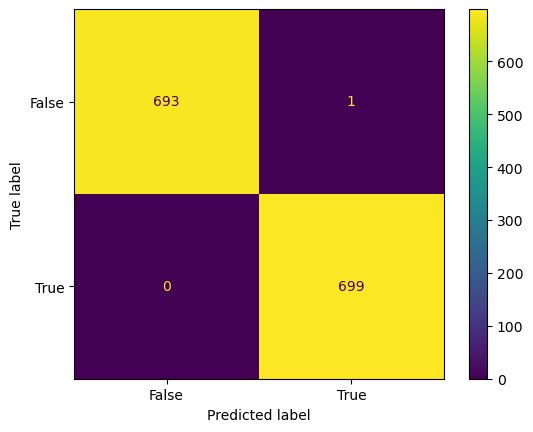

In [67]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])


cm_display.plot()
plt.show()

In [68]:
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))

In [69]:
import os

In [70]:
os.getcwd()

'C:\\Users\\Asus\\Data Science\\DS Project\\Thyroid project'